# Radiative Boundary Conditions

In [1]:
<< xAct`xTras`

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
Package xAct`xPert`  version 1.0.6, {2018, 2, 28}
CopyRight (C) 2005-2020, David Brizuela, Jose M. Martin-Garcia and Guillermo\
 
>   A. Mena Marugan, under the General Public License.
** Variable $PrePrint assigned value ScreenDollarIndices
** Variable Prefix changed from Prefix to Postfix
** Option AllowUpperDerivatives of ContractMetric changed from False to True
** Option MetricOn of MakeRule changed from None to All
** Option ContractMetrics of MakeRule changed 

#### Define Symbols

In [7]:
Do[DefConstantSymbol[ToExpression["v" <> ToString[ii]], PrintAs -> ToString[Subscript["v", ToString[ii]], FormatType -> StandardForm]], {ii, 1, 3}];
Do[DefConstantSymbol[ToExpression["s" <> ToString[ii]], PrintAs -> ToString[Subscript["s", ToString[ii]], FormatType -> StandardForm]], {ii, 1, 3}];

** DefConstantSymbol: Defining constant symbol v1. 
** DefConstantSymbol: Defining constant symbol v2. 
** DefConstantSymbol: Defining constant symbol v3. 
** DefConstantSymbol: Defining constant symbol s1. 
** DefConstantSymbol: Defining constant symbol s2. 
** DefConstantSymbol: Defining constant symbol s3. 


## Scalar Waves

$$
\begin{align}
  \partial_t{u}
  &=\rho, \\
  \partial_t{\rho}
  &=\partial_kv_k, \\
  \partial_t{v_k}
  &=\partial_k \rho.
\end{align}
$$

where $v_k\equiv\partial_ku$.

u

ρ

v1

v2

v3
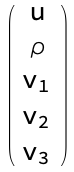

In [9]:
U = {u, \[Rho], v1, v2, v3};
U//MatrixForm

#### Replacement Rules

2     2     2          2     2     2
{sx  + sy  + sz  -> 1, -sx  - sy  - sz  -> -1, sx vx + sy vy + sz vz -> sv, 
 
>   -(sx vx) - sy vy - sz vz -> -sv}
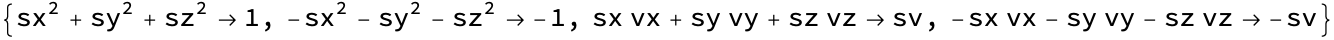

In [2]:
cnd = {
    sx^2+sy^2+sz^2 -> 1,
    -sx^2-sy^2-sz^2 -> -1,
    sx vx+sy vy+sz vz -> sv,
    -sx vx-sy vy-sz vz -> -sv
}

### Characteristic matrix with respect to normal $s_i$: $A^{\mathbf{s}\alpha}{}_\beta$

0     0     0     0     0

0     0     -sx   -sy   -sz

0     -sx   0     0     0

0     -sy   0     0     0

0     -sz   0     0     0
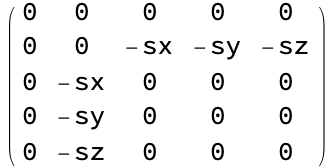

In [3]:
As = {
    {0, 0, 0, 0, 0},
    {0, 0, -sx, -sy, -sz},
    {0, -sx, 0, 0, 0},
    {0, -sy, 0, 0, 0},
    {0, -sz, 0, 0, 0}
};
As//MatrixForm

0

-sv

-(sx ρ)

-(sy ρ)

-(sz ρ)
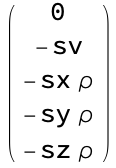

In [5]:
As.U/.cnd//MatrixForm

### Characteristic Fields

$$U^{\hat{\alpha}}=e^{\hat{\alpha}}{}_\beta U^{\beta}$$

#### Left Eigenvectors

where $e^{\hat{\alpha}}{}_\beta$ is the **LEFT** eigenvectors of $A^{\mathbf{s}\alpha}{}_{\beta}$
$$e^{\hat{\alpha}}{}_\mu A^{\mathbf{s}\mu}{}_\beta=v^{(\hat{\alpha})}e^{\hat{\alpha}}{}_\beta$$

In [6]:
eValue = Eigenvalues[Transpose[As]]/.cnd

{0, 0, 0, -1, 1}

$$
\begin{align}
  \begin{array}{lll}
    U^{\hat{0}}    &=u, \quad                          &\text{speed} \quad 0, \\
    U^{\hat{1}\pm} &=\rho\mp\mathbf{s}\cdot\mathbf{v},         &\text{speed} \quad \pm 1, \\
    U^{\hat{2}}    &=\mathbf{v}-\mathbf{s}(\mathbf{s}\cdot\mathbf{v}), &\text{speed} \quad 0.
  \end{array}
\end{align}
$$

1          0          0          0          0


0          1          -sx        -sy        -sz


0          1          sx         sy         sz

                            2
0          0          1 - sx     -(sx sy)   -(sx sz)

                                       2
0          0          -(sx sy)   1 - sy     -(sy sz)

                                                  2
0          0          -(sx sz)   -(sy sz)   1 - sz
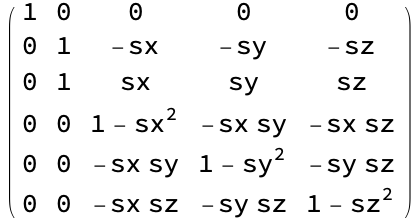

In [7]:
eLeftVector = {
    {1, 0, 0, 0, 0},
    {0, 1, -sx, -sy, -sz},
    {0, 1, sx, sy, sz},
    {0, 0, 1-sx sx, -sx sy, -sx sz},
    {0, 0, -sy sx, 1-sy sy, -sy sz},
    {0, 0, -sz sx, -sz sy, 1-sz sz}
};
eLeftVector//MatrixForm

In [9]:
eLeftVector[[1]].As - eLeftVector[[1]]eValue[[1]]

{0, 0, 0, 0, 0}

In [10]:
eLeftVector[[2]].As - eLeftVector[[2]]eValue[[5]]/.cnd

{0, 0, 0, 0, 0}

In [11]:
eLeftVector[[3]].As - eLeftVector[[3]]eValue[[4]]/.cnd

{0, 0, 0, 0, 0}

In [12]:
Table[(eLeftVector[[i]].As - eLeftVector[[i]]eValue[[1]]//Simplify)/.cnd, {i,4,6}]

{{0, 0, 0, 0, 0}, {0, 0, 0, 0, 0}, {0, 0, 0, 0, 0}}

u


-sv + ρ


sv + ρ

       2
(1 - sx ) vx - sx sy vy - sx sz vz

                     2
-(sx sy vx) + (1 - sy ) vy - sy sz vz

                                2
-(sx sz vx) - sy sz vy + (1 - sz ) vz
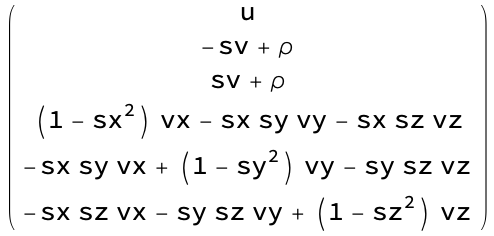

In [13]:
(eLeftVector.U)/.cnd//MatrixForm

#### Right Eigenvectors (left inverse of Left Eigenvectors)

and $e^{\alpha}{}_{\hat{\beta}}$ is the **RIGHT** eigenvector of $A^{\mathbf{s}\alpha}{}_{\beta}$
$$A^{\mathbf{s}\alpha}{}_\mu e^{\mu}{}_{\hat{\beta}} =v_{(\hat{\beta})}e^{\alpha}{}_{\hat{\beta}}$$

1         0         0         0         0         0

          1         1
          -         -
0         2         2         0         0         0

            1       sx
          -(-) sx   --
0           2       2         1         0         0

            1       sy
          -(-) sy   --
0           2       2         0         1         0

            1       sz
          -(-) sz   --
0           2       2         0         0         1
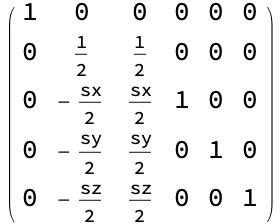

In [47]:
(*eRightVector = PseudoInverse[eLeftVector]*)
eRightVector = {
    {1, 0, 0, 0, 0, 0},
    {0, 1/2, 1/2, 0, 0, 0},
    {0, -sx/2, sx/2, 1, 0, 0},
    {0, -sy/2, sy/2, 0, 1, 0},
    {0, -sz/2, sz/2, 0, 0, 1}
};
eRightVector//MatrixForm

It's left inverse
$$e^{\alpha}{}_{\hat{\gamma}}e^{\hat{\gamma}}{}_\beta=\delta^\alpha{}_{\beta}$$

1   0   0   0   0

0   1   0   0   0

0   0   1   0   0

0   0   0   1   0

0   0   0   0   1
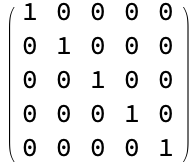

In [43]:
eRightVector.eLeftVector//Simplify//MatrixForm

But not right inverse
$$e^{\hat{\alpha}}{}_{\gamma}e^{\gamma}{}_{\hat{\beta}}\neq \delta^{\hat{\alpha}}{}_{\hat{\beta}}$$

1          0          0          0          0          0


0          1          0          -sx        -sy        -sz


0          0          1          sx         sy         sz

                                       2
0          0          0          1 - sx     -(sx sy)   -(sx sz)

                                                  2
0          0          0          -(sx sy)   1 - sy     -(sy sz)

                                                             2
0          0          0          -(sx sz)   -(sy sz)   1 - sz
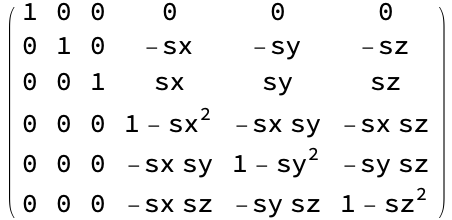

In [46]:
(eLeftVector.eRightVector//Simplify)/.cnd//MatrixForm

### Radiative Boundary Condition

$$U^{\hat{1}-}=0$$